In [1]:
from traveltimes_NLL_class import Traveltimes
import numpy as np
import matplotlib.pyplot as plt
from latlon2cart_class import Coordinates

In [2]:
db_path = '/Users/giaco/UNI/PhD_CODE/GIT/DAS_synthetic_eikonal/3D/NLL/FLEGREI/nll_grid'
hdr_filename = 'header.hdr'
precision='single'
model = 'time'

tobj = Traveltimes(db_path, hdr_filename)
tp = tobj.load_traveltimes('P', model, precision)
ts = tobj.load_traveltimes('S', model, precision)

In [3]:
# NLL parameters
nx=151 # number of grid points in x direction
ny=151 # number of grid points in y direction
nz=61  # number of grid points in z direction

dx=0.1 # km
dy=0.1 # km
dz=0.1 # km

ox=0.0      # origin x coordinate (km)
oy=0.0      # origin y coordinate (km)
oz=-1.0     # origin z coordinate (km), positive DOWN

coord_origin_lat=40.777242
coord_origin_lon=14.025848

### travel time check

In [ ]:
#CNIS 40.798170 14.163176 0.50
#CPOZ 40.821072 14.119110 0.52
#CBAC 40.810901 14.080570 0.77
st_name='CNIS'
source_lat = 40.798170
source_lon = 14.163176
source_z = -0.5  # km , positive down

coord=Coordinates(coord_origin_lat, coord_origin_lon,  0.0)
source_x,source_y,source_z = coord.geo2cart(source_lat, source_lon, source_z) 
source_x,source_y,source_z = source_x * 1e-3, source_y * 1e-3, source_z * 1e-3  # convert from m to km
print(f"Source coordinates in : x={source_x:.2f} km, y={source_y:.2f} km, z={source_z:.2f} km")

source_x_index = int( round( (source_x - ox) / dx ) ) 
source_y_index = int( round( (source_y - oy) / dy ) )
source_z_index = int( round( (source_z - oz) / dz ) )
print(f"Source indices in grid: ix={source_x_index}, iy={source_y_index}, iz={source_z_index}")


In [ ]:
tt_cube= np.reshape(tp[st_name],(nx, ny, nz))
tt=tt_cube[source_x_index, source_y_index, source_z_index]
print(f'travel time at station: {tt}')

tt_cube[source_x_index, source_y_index, source_z_index]=-1
#plt.contour(tt_cube[:,:,source_z_index].T,origin='lower',extent=[0.,15.1,0.,15.1] , levels=30)
plt.imshow(tt_cube[:,:,source_z_index].T,origin='lower')
plt.colorbar()

### ev travel time

In [4]:
ev_name='flegrei_2025_01_17_16_53_50'
ev_lat = 40.828167
ev_lon = 14.135
ev_z = 1.720  # km , positive down

coord=Coordinates(coord_origin_lat, coord_origin_lon,  0.0)
ev_x,ev_y,ev_z = coord.geo2cart(ev_lat, ev_lon, ev_z) 
ev_x,ev_y,ev_z = ev_x * 1e-3, ev_y * 1e-3, ev_z * 1e-3  # convert from m to km
print(f"Source coordinates in : x={ev_x:.2f} km, y={ev_y:.2f} km, z={ev_z:.2f} km")

ev_x_index = int( round( (ev_x - ox) / dx ) ) 
ev_y_index = int( round( (ev_y - oy) / dy ) )
ev_z_index = int( round( (ev_z - oz) / dz ) )
print(f"Source indices in grid: ix={ev_x_index}, iy={ev_y_index}, iz={ev_z_index}")

Source coordinates in : x=9.21 km, y=5.66 km, z=1.71 km
Source indices in grid: ix=92, iy=57, iz=27


In [6]:
tt_p=[]
tt_s=[]
for keys in tp.keys():
    # P wave tt
    tt_cube= np.reshape(tp[keys],(nx, ny, nz))
    tt=tt_cube[ev_x_index, ev_y_index, ev_z_index]
    tt_p.append(tt)
    # S wave tt
    tt_cube= np.reshape(ts[keys],(nx, ny, nz))
    tt=tt_cube[ev_x_index, ev_y_index, ev_z_index]
    tt_s.append(tt)


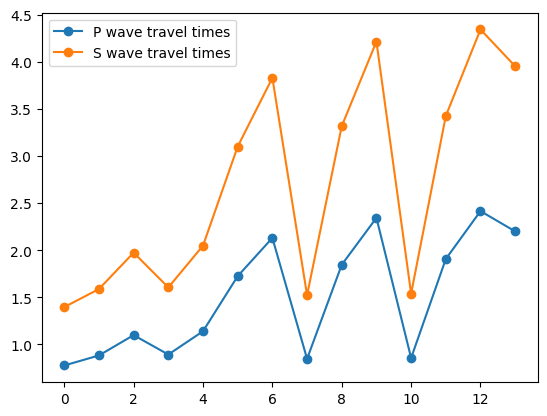

In [9]:
plt.plot(tt_p,'o-', label='P wave travel times')
plt.plot(tt_s,'o-', label='S wave travel times')
plt.legend()

In [ ]:
    #plt.figure(f'synthetic_seismogram_event_{synth.event[0][0]}', figsize=(10,6))
    #plt.title(f'Synthetic Seismogram - Event: {synth.event[0][0]}')
    #plt.imshow(seismogram, aspect='auto', 
    #           extent=[synth.tax[0],synth.tax[-1],synth.ch_indices[-1],synth.ch_indices[0]], 
    #           cmap='seismic', vmin=-1, vmax=1)
    #plt.xlabel('Time [s]')
    #plt.ylabel('Depth [m]')
    #plt.show()